<a href="https://www.kaggle.com/code/suryanshmehrotra/pokemon-descriptive-analysis?scriptVersionId=121754734" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #graph plotting
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pokemon/report_Pokemon.pdf
/kaggle/input/pokemon/pokemon_alopez247.csv


In [2]:
df = pd.read_csv("/kaggle/input/pokemon/pokemon_alopez247.csv")
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3]:
df.tail()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only
720,721,Volcanion,Fire,Water,600,80,110,120,130,90,...,Brown,False,NaN,Undiscovered,NaN,False,1.70,195.0,3,quadruped


In [4]:
df.index

RangeIndex(start=0, stop=721, step=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [6]:
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


In [7]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [8]:
#Body Measurements of Pokemon
measurements = df[['Name','Height_m','Weight_kg']]
measurements

,Name,Height_m,Weight_kg
0,Bulbasaur,0.71,6.9
1,Ivysaur,0.99,13.0
2,Venusaur,2.01,100.0
3,Charmander,0.61,8.5
4,Charmeleon,1.09,19.0
...,...,...,...
716,Yveltal,5.79,203.0
717,Zygarde,5.00,305.0
718,Diancie,0.71,8.8
719,Hoopa,0.51,9.0


In [9]:
#Red Coloured Pokemons
red_pokemons = df[df['Color'] == 'Red']
red_pokemons

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,Red,True,0.875,Monster,Dragon,True,1.70,90.5,45,bipedal_tailed
44,45,Vileplume,Grass,Poison,490,75,80,85,110,90,...,Red,True,0.500,Grass,NaN,False,1.19,18.6,45,bipedal_tailless
45,46,Paras,Bug,Grass,285,35,70,55,45,55,...,Red,True,0.500,Bug,Grass,False,0.30,5.4,190,insectoid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,661,Fletchling,Normal,Flying,278,45,50,43,40,38,...,Red,True,0.500,Flying,NaN,False,0.30,1.7,255,two_wings
661,662,Fletchinder,Fire,Flying,382,62,73,55,56,52,...,Red,True,0.500,Flying,NaN,False,0.71,16.0,120,two_wings
662,663,Talonflame,Fire,Flying,499,78,81,71,74,69,...,Red,True,0.500,Flying,NaN,False,1.19,24.5,45,two_wings
696,697,Tyrantrum,Rock,Dragon,521,82,121,119,69,59,...,Red,True,0.875,Monster,Dragon,False,2.49,270.0,45,bipedal_tailed


In [10]:
#Average Catch Rate
Avg_Catch_Rate = df['Catch_Rate'].mean()
print("Average Catch Rate of Pokemons is" , Avg_Catch_Rate)

Average Catch Rate of Pokemons is 100.24687933425797


In [11]:
#Pokemons with Name Starting  From 'N'
S_named = df.loc[(df['Name'].str.startswith('N'))]
S_named

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
28,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,...,Blue,True,0.00,Monster,Field,False,0.41,7.0,235,quadruped
29,30,Nidorina,Poison,NaN,365,70,62,67,55,55,...,Blue,True,0.00,Undiscovered,NaN,False,0.79,20.0,120,quadruped
30,31,Nidoqueen,Poison,Ground,505,90,92,87,75,85,...,Blue,True,0.00,Undiscovered,NaN,False,1.30,60.0,45,bipedal_tailed
31,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,...,Purple,True,1.00,Monster,Field,False,0.51,9.0,235,quadruped
32,33,Nidorino,Poison,NaN,365,61,72,57,55,55,...,Purple,True,1.00,Monster,Field,False,0.89,19.5,120,quadruped
33,34,Nidoking,Poison,Ground,505,81,102,77,85,75,...,Purple,True,1.00,Monster,Field,False,1.40,62.0,45,bipedal_tailed
37,38,Ninetales,Fire,NaN,505,73,76,75,81,100,...,Yellow,True,0.25,Field,NaN,False,1.09,19.9,75,quadruped
163,164,Noctowl,Normal,Flying,442,100,50,50,76,96,...,Brown,True,0.50,Flying,NaN,False,1.60,40.8,90,two_wings
176,177,Natu,Psychic,Flying,320,40,50,45,70,45,...,Green,True,0.50,Flying,NaN,False,0.20,2.0,190,two_wings
273,274,Nuzleaf,Grass,Dark,340,70,70,40,60,40,...,Brown,True,0.50,Field,Grass,False,0.99,28.0,120,bipedal_tailless


In [12]:
#Number of pokemons that has Mega Evolution
print(df['hasMegaEvolution'].values.sum())

46


In [13]:
#Fire and Rock type Pokemons
#Filtering Pandas Dataframe with multiple conditions
fire_type = df.loc[(df['Type_1'] == 'Fire') & (df['Type_2'] == 'Ground')]
fire_type

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
321,322,Numel,Fire,Ground,305,60,60,40,65,45,...,Yellow,True,0.5,Field,NaN,False,0.71,24.0,255,quadruped
322,323,Camerupt,Fire,Ground,460,70,100,70,105,75,...,Red,True,0.5,Field,NaN,True,1.91,220.0,150,quadruped


In [14]:
#pokemon with max attack
attribute = 'Attack'
df[(df[attribute]) == (df[attribute].max())]

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
408,409,Rampardos,Rock,NaN,495,97,165,60,65,50,...,Blue,True,0.875,Monster,NaN,False,1.6,102.5,45,bipedal_tailed


In [15]:
#Total Number of Bug Type Pokemons
Type = "Bug"
print("Total Number of" , Type , "type Pokemons is" , df['Type_1'].value_counts()[Type])

Total Number of Bug type Pokemons is 63


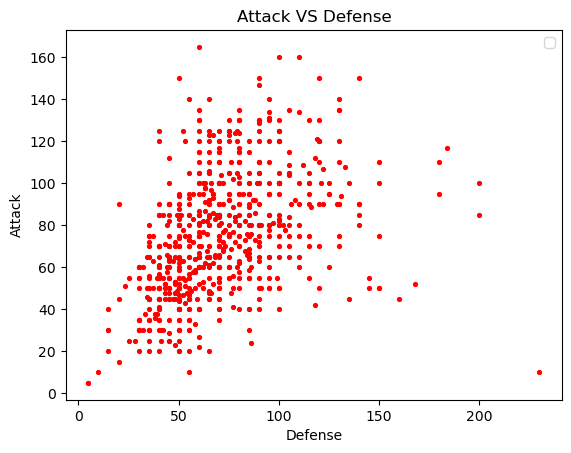

In [16]:
x = df['Defense']
y = df['Attack']

#plt.plot(x,y)
plt.scatter(x, y, color= "r", marker= ".", s=30)
  
# x-axis label
plt.xlabel('Defense')
# frequency label
plt.ylabel('Attack')
# plot title
plt.title('Attack VS Defense')
# showing legend
plt.legend()
plt.show()

**Analysing Colors of Pokemon**

In [17]:
#counting number of distinct elements in 'Color' column
df['Color'].nunique()

10

In [18]:
#changing column 'Color' to Set to  Duplicates
color_set = set(df['Color'])
color_set

{'Black',
 'Blue',
 'Brown',
 'Green',
 'Grey',
 'Pink',
 'Purple',
 'Red',
 'White',
 'Yellow'}

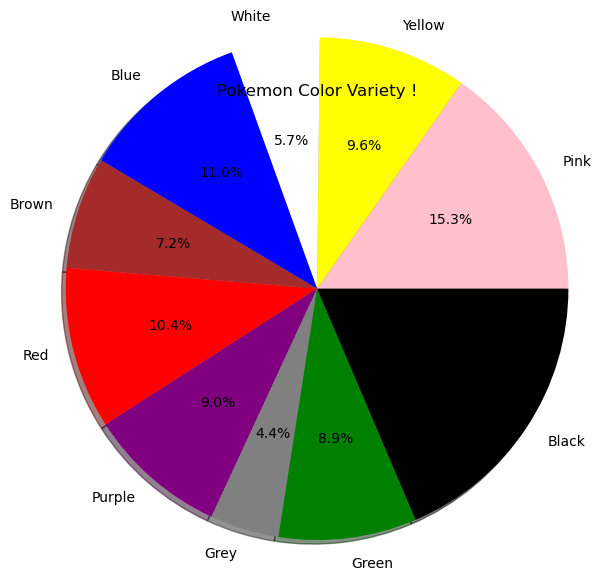

In [19]:

# portion covered by each label
slices = [df['Color'].value_counts()['Brown'],
          df['Color'].value_counts()['Grey'],
          df['Color'].value_counts()['Pink'],
          df['Color'].value_counts()['Green'],
          df['Color'].value_counts()['White'],
          df['Color'].value_counts()['Red'],
          df['Color'].value_counts()['Purple'],
          df['Color'].value_counts()['Black'],
          df['Color'].value_counts()['Yellow'],
          df['Color'].value_counts()['Blue']]

#plotting pie chart
plt.pie(slices, colors = color_set, labels = color_set, radius = 1.7, shadow = True, autopct='%1.1f%%')
plt.title("Pokemon Color Variety !")
plt.show()

In [20]:
df

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only
